In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
# Project : Telecom churn data, where we need to build a ML model, which can help to predict whether a customer would churn or not depending on the current data plans #

In [4]:
os.chdir("E:\Data Science\R Programs\Csv files")
os.getcwd()
df = pd.read_csv("Churn_MV.csv")

df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,0.0,1.0,...,45.07,99.0,16.78,91.0,11.01,3.0,2.7,KS,415.0,382-4657
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,0.0,1.0,...,27.47,103.0,16.62,103.0,11.45,3.0,3.7,OH,415.0,371-7191
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns


Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Daily Charges MV', 'Eve Calls',
       'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls',
       'Intl Charge', 'State', 'Area Code', 'Phone'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 22 columns):
Account Length      3333 non-null float64
VMail Message       3333 non-null float64
Day Mins            3333 non-null float64
Eve Mins            3333 non-null float64
Night Mins          3333 non-null float64
Intl Mins           3333 non-null float64
CustServ Calls      3333 non-null float64
Churn               3333 non-null float64
Intl Plan           3333 non-null float64
VMail Plan          3333 non-null float64
Day Calls           3333 non-null float64
Day Charge          3333 non-null float64
Daily Charges MV    3283 non-null float64
Eve Calls           3333 non-null float64
Eve Charge          3333 non-null float64
Night Calls         3333 non-null float64
Night Charge        3333 non-null float64
Intl Calls          3333 non-null float64
Intl Charge         3333 non-null float64
State               3333 non-null object
Area Code           3333 non-null float64
Phone       

In [5]:
# Looking at the data, we need to understand tge data types #

df.info()
# 1) Check the variable type, Feature transformation#

# daily charges MV has missing values, churn, Intl plan, Vmail plan are of float type, which needs to be chnages to categorical type #

df['Churn'] = df['Churn'].astype('category')
df['Intl Plan'] = df['Intl Plan'].astype('category')
df['VMail Plan'] = df['VMail Plan'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 22 columns):
Account Length      3333 non-null float64
VMail Message       3333 non-null float64
Day Mins            3333 non-null float64
Eve Mins            3333 non-null float64
Night Mins          3333 non-null float64
Intl Mins           3333 non-null float64
CustServ Calls      3333 non-null float64
Churn               3333 non-null float64
Intl Plan           3333 non-null float64
VMail Plan          3333 non-null float64
Day Calls           3333 non-null float64
Day Charge          3333 non-null float64
Daily Charges MV    3283 non-null float64
Eve Calls           3333 non-null float64
Eve Charge          3333 non-null float64
Night Calls         3333 non-null float64
Night Charge        3333 non-null float64
Intl Calls          3333 non-null float64
Intl Charge         3333 non-null float64
State               3333 non-null object
Area Code           3333 non-null float64
Phone       

In [6]:
# There aere unwanted colummns which are not required for analysis : State, Area Code, Phone can be dropped

df = df.drop(['State','Area Code','Phone'],axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 19 columns):
Account Length      3333 non-null float64
VMail Message       3333 non-null float64
Day Mins            3333 non-null float64
Eve Mins            3333 non-null float64
Night Mins          3333 non-null float64
Intl Mins           3333 non-null float64
CustServ Calls      3333 non-null float64
Churn               3333 non-null category
Intl Plan           3333 non-null category
VMail Plan          3333 non-null category
Day Calls           3333 non-null float64
Day Charge          3333 non-null float64
Daily Charges MV    3283 non-null float64
Eve Calls           3333 non-null float64
Eve Charge          3333 non-null float64
Night Calls         3333 non-null float64
Night Charge        3333 non-null float64
Intl Calls          3333 non-null float64
Intl Charge         3333 non-null float64
dtypes: category(3), float64(16)
memory usage: 852.9 KB


In [20]:
df.columns



Index(['Account Length', 'VMail Message', 'CustServ Calls', 'Churn',
       'Intl Plan', 'VMail Plan', 'Day Calls', 'Day Charge', 'Eve Calls',
       'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls',
       'Intl Charge'],
      dtype='object')

In [7]:
# 2) Missing valies #
print(df.shape)

# Shape : (6666,19)
# 1st we will remove the missing values rows, i.e rows which contain all elements as missing #

df = df.dropna(how='all',axis=0)
print(df.shape)

(6666, 19)
(3333, 19)


In [85]:
len(df)

3333

In [8]:
df.isnull().sum() 

# There are 50 missing values in Daily Charges MV # We can impute it with the help of mean or median #

df['Daily Charges MV'] = df['Daily Charges MV'].fillna(df['Daily Charges MV'].median())


In [8]:
df.isnull().sum().sum()


0

In [8]:
print(df['Daily Charges MV'].isnull().sum())

0


In [9]:
# 3) Check for duplicates rows or columns, we can drop them #

e = print(df.groupby(df['Churn']).sum())
e
df = df.drop_duplicates()
df.shape
# two variables : Day Charges and Daily Charges MV, we can drop any one of the variable : Daily Charges MV 

df = df.drop(['Daily Charges MV'],axis=1)
print(df.shape)

       Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  \
Churn                                                                  
0.0          287262.0        24523.0  499250.9  567273.4    570379.6   
1.0           49587.0         2471.0   99939.5  102594.1     99126.9   

       Intl Mins  CustServ Calls  Day Calls  Day Charge  Daily Charges MV  \
Churn                                                                       
0.0      28952.8          4132.0   285807.0    84874.20          84861.62   
1.0       5168.1          1077.0    48945.0    16989.97          16904.78   

       Eve Calls  Eve Charge  Night Calls  Night Charge  Intl Calls  \
Churn                                                                 
0.0     285110.0    48218.89     285166.0      25667.31     12919.0   
1.0      48571.0     8720.55      48493.0       4460.76      2011.0   

       Intl Charge  
Churn               
0.0        7818.70  
1.0        1395.65  
(3333, 18)


In [40]:
df.describe()

# Looking at yhe range, its not required to go for feature scaling#

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000


In [41]:
# other prepressing steps such as : dummy encoding, feature scaling, outliers, multi collinearity needs to be dome after Data Visualization #

# 5) Data Visualization #

df.columns
#Target variable : Churn


Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'],
      dtype='object')

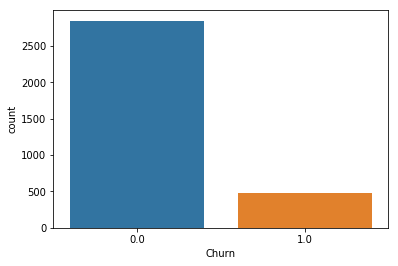

In [11]:
sns.countplot(df['Churn'])
plt.show()
# there around 500 customers churned from a total of 3333 customers #

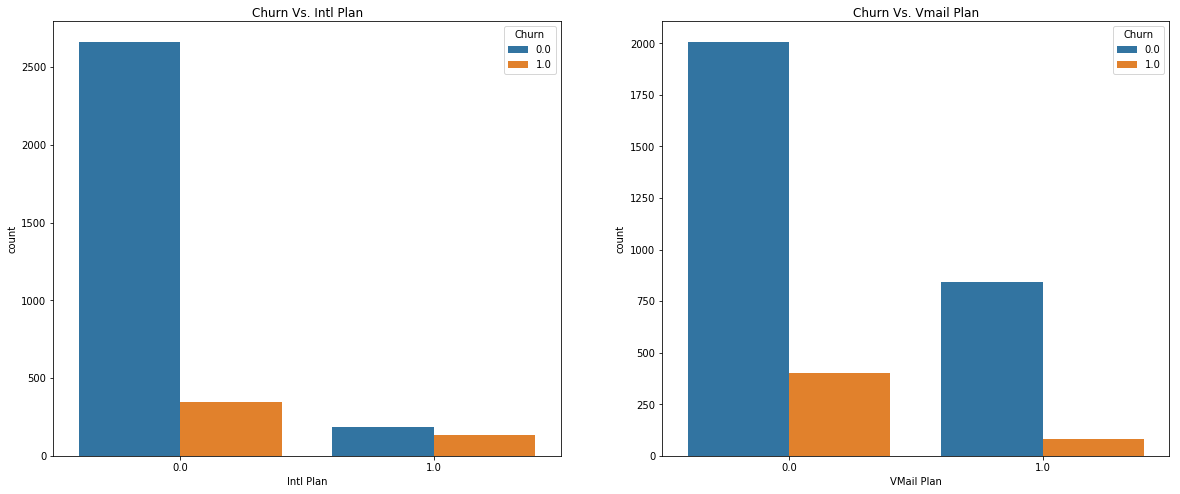

In [10]:
# lets understand categorical variables relationship with target variable # Intl plan and Vmail Plan 

# df.info - variables info , conversion 

# pre processing steps 

# drop missing values (all null values, impute null values in columns ), duplicates and handle synonyms & homonyms #

# independent variables should not have multi collinearity (VIF)

# needs to be relationship between independent & dependent variable  - visualization 
# 1. relationship between categorical & mumerical - box plot
# 2. relationship between categprical & categoruical - bar chart (countplot)
# 3. relationship between numerical & mumerical - scatter plot 

# Feature transformation - feature scaling, PCA and handling categorical variables

# there shloud not be any outliers in the model, need tro impute thenm #

import seaborn as sns
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Churn Vs. Intl Plan')
sns.countplot(x=df['Intl Plan'],hue=df['Churn'])

plt.subplot(1,2,2)
plt.title('Churn Vs. Vmail Plan')
sns.countplot(x=df['VMail Plan'], hue=df['Churn'])
plt.show()

#There is no relationship between VMail Plan and churn
# There is a relationship between Intl Plan and churn, the customers who are taking an Intl Plan are likely to churn more as compared to those whio are no taking#

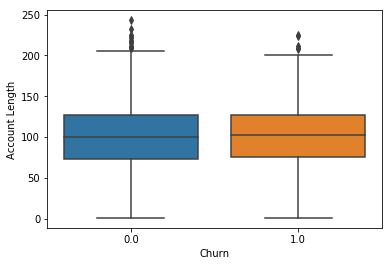

In [12]:
# Account length #

sns.boxplot(x=df['Churn'],y=df['Account Length'])
plt.show()

# Numerical variables: 'Account Length', 'VMail Message', 'CustServ Calls', 'Day Calls', 'Day Charge', 'Eve Calls',
      # 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Day Mins', 'Might Mins', 'Eve Mins','Intl Mins'
      # 'Intl Charge']
# Categorical varoables : 'churn','IntlPlan', 'VMail Plan'

# There is no significance of account length on churning rate #

# Dropping insignificant variables : Account Length, V Mail Plan, night charge, VMail Message, Night Mins

In [10]:
# dropping the insignificant variables #

df = df.drop(['Account Length','Night Charge','VMail Message','Night Mins'],axis=1)

In [8]:
df.head()

,Day Mins,Eve Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Intl Calls,Intl Charge
1,265.1,197.4,10.0,1.0,0.0,0.0,1.0,110.0,45.07,99.0,16.78,91.0,3.0,2.70
3,161.6,195.5,13.7,1.0,0.0,0.0,1.0,123.0,27.47,103.0,16.62,103.0,3.0,3.70
5,243.4,121.2,12.2,0.0,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,5.0,3.29
7,299.4,61.9,6.6,2.0,0.0,1.0,0.0,71.0,50.90,88.0,5.26,89.0,7.0,1.78
9,166.7,148.3,10.1,3.0,0.0,1.0,0.0,113.0,28.34,122.0,12.61,121.0,3.0,2.73


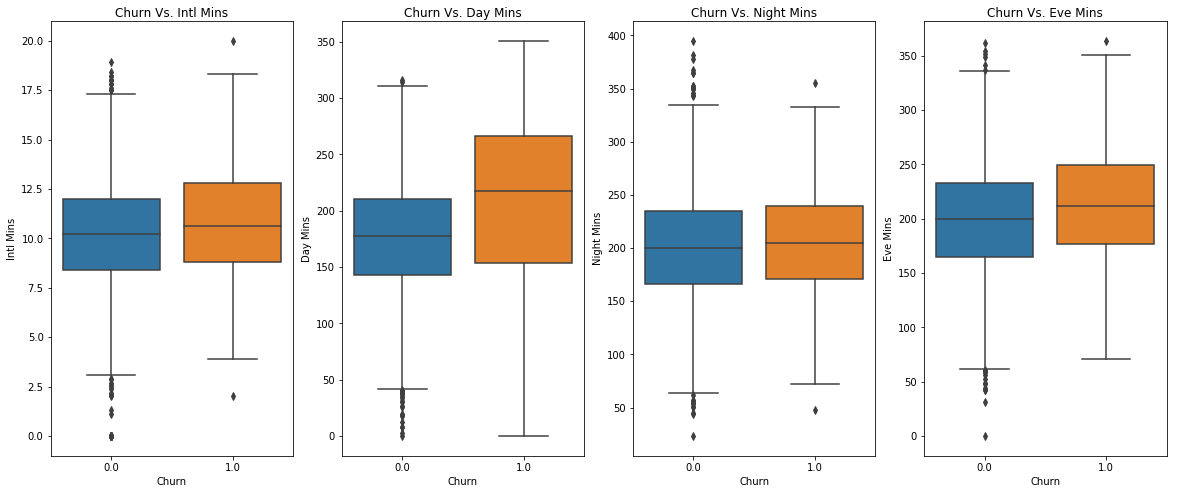

In [13]:
import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,4,1)
plt.title('Churn Vs. Intl Mins')
sns.boxplot(x=df['Churn'],y=df['Intl Mins'])

plt.subplot(1,4,2)
plt.title('Churn Vs. Day Mins')
sns.boxplot(x=df['Churn'],y=df['Day Mins'])

plt.subplot(1,4,3)
plt.title('Churn Vs. Night Mins')
sns.boxplot(x=df['Churn'],y=df['Night Mins'])

plt.subplot(1,4,4)
plt.title('Churn Vs. Eve Mins')
sns.boxplot(x=df['Churn'],y=df['Eve Mins'])

plt.show()


# there is relationship between Intl Min, Day Mins , Eve Mins with churn vairbake 

# no relationshoo between chrurn and Night mins

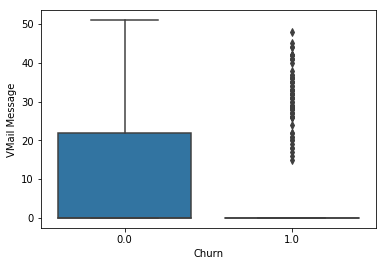

In [31]:

sns.boxplot(x=df['Churn'],y=df['VMail Message'])
plt.show()

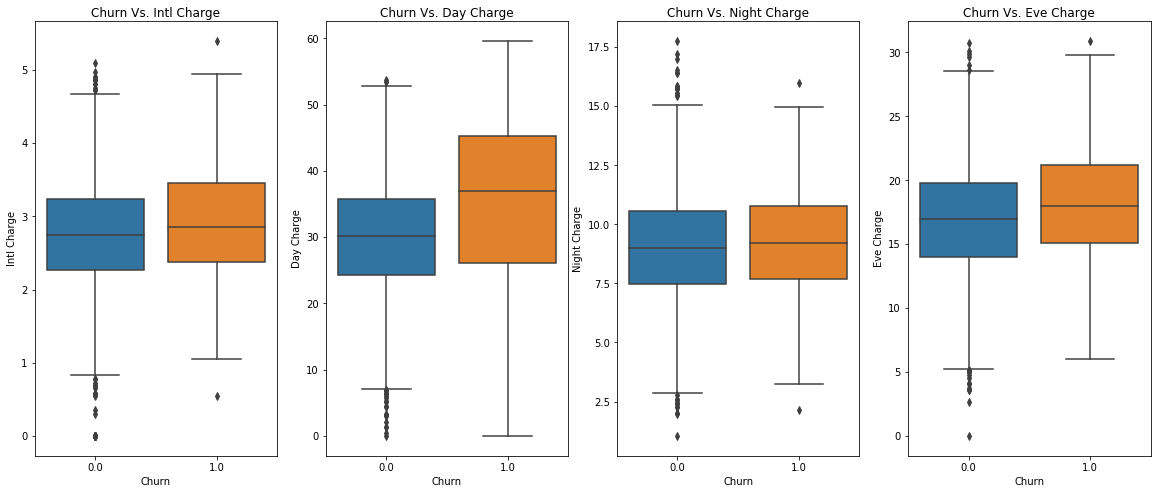

In [14]:
# Day charge, eve charge, Intl charge and Night charge #

# Relationship with target variable#

import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,4,1)
plt.title('Churn Vs. Intl Charge')
sns.boxplot(x=df['Churn'],y=df['Intl Charge'])

plt.subplot(1,4,2)
plt.title('Churn Vs. Day Charge')
sns.boxplot(x=df['Churn'],y=df['Day Charge'])

plt.subplot(1,4,3)
plt.title('Churn Vs. Night Charge')
sns.boxplot(x=df['Churn'],y=df['Night Charge'])

plt.subplot(1,4,4)
plt.title('Churn Vs. Eve Charge')
sns.boxplot(x=df['Churn'],y=df['Eve Charge'])

plt.show()

# Fromt this plot, we can Churn depends on Intl charge, Eve Charge and Day Charge

# Churn Vs. Intl Charge,churn Vs. Eve Charge, Churn Vs. Day Charge  : Customers paying high charges for Day,Eve and Intl are churning more as compared to otherd

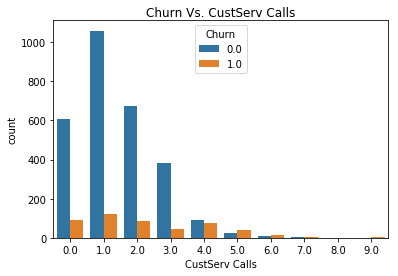

In [16]:
# Relationship between CustServ Calls vs Charge #

plt.title('Churn Vs. CustServ Calls')
sns.countplot(x=df['CustServ Calls'],hue=df['Churn'])
plt.show()

# Those customers who are doing more no. of CustServ Calls are likely to churn more as compared to others, hence churn depends on CustServ Calls

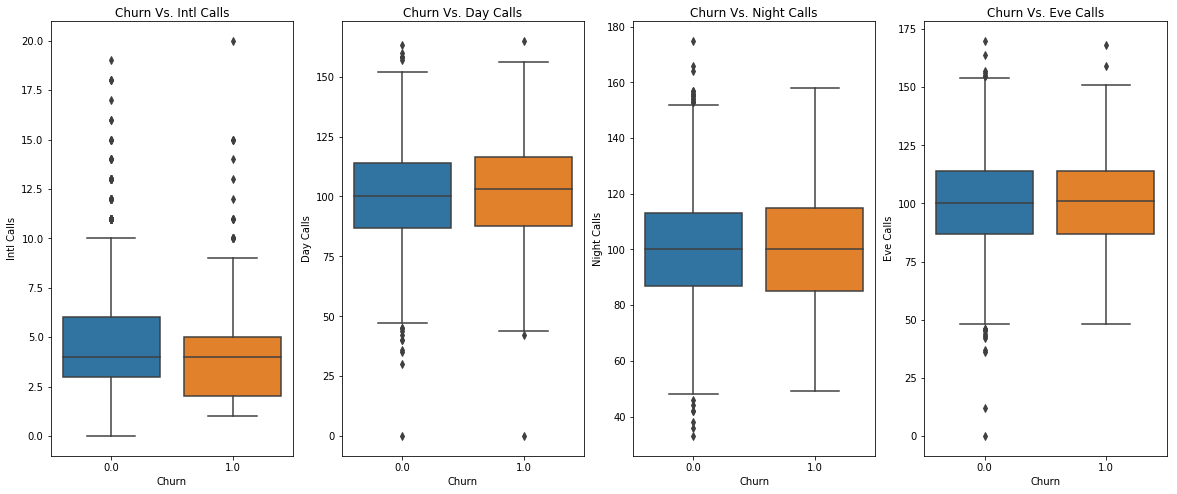

In [17]:
# eve calls, night calls, intl calls and night calls

import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,4,1)
plt.title('Churn Vs. Intl Calls')
sns.boxplot(x=df['Churn'],y=df['Intl Calls'])

plt.subplot(1,4,2)
plt.title('Churn Vs. Day Calls')
sns.boxplot(x=df['Churn'],y=df['Day Calls'])

plt.subplot(1,4,3)
plt.title('Churn Vs. Night Calls')
sns.boxplot(x=df['Churn'],y=df['Night Calls'])

plt.subplot(1,4,4)
plt.title('Churn Vs. Eve Calls')
sns.boxplot(x=df['Churn'],y=df['Eve Calls'])

plt.show()

# there is relationship between eve., day , night and intl calls wiht churn

In [38]:
# Correlatiin in the matrix, can remove the highly correlated variables # 

corr = df.corr()
corr

,Day Mins,Eve Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Intl Calls,Intl Charge
Day Mins,1.000000,0.007043,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.008033,-0.010092
Eve Mins,0.007043,1.000000,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,0.002541,-0.011067
Intl Mins,-0.010155,-0.011035,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,0.032304,0.999993
CustServ Calls,-0.013423,-0.012985,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.017561,-0.009675
Day Calls,0.006750,-0.021451,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.004574,0.021666
Day Charge,1.000000,0.007050,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.008032,-0.010094
Eve Calls,0.015769,-0.011430,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,0.017434,0.008674
Eve Charge,0.007029,1.000000,-0.011043,-0.012987,-0.021449,0.007036,-0.011423,1.000000,0.007596,0.002541,-0.011074
Night Calls,0.022972,0.007586,-0.013605,-0.012802,-0.019557,0.022972,0.007710,0.007596,1.000000,0.000305,-0.013630
Intl Calls,0.008033,0.002541,0.032304,-0.017561,0.004574,0.008032,0.017434,0.002541,0.000305,1.000000,0.032372


In [10]:
# using this steps for dropping highly correlated variables only for doing logistic regression #


# from this corrmpkot, 
# daymins and day cjharge is corelated
# even nmin and eve, charge is coorelated 
# Intl mins and Intl charge is corelated #
# we will drop the eve mins, night mins and day mins #

# If wee are dpoing PCA, then need not to drop this variables as PCA takes comtrol of multi collinearity #
df = df.drop(['Day Mins','Intl Mins','Eve Mins'],axis=1)
df.head()

# not dropping any of this variables as the decsion and random forest takes care of multi collinearity and outliers #

,CustServ Calls,Churn,Intl Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Intl Calls,Intl Charge
1,1.0,0.0,0.0,110.0,45.07,99.0,16.78,91.0,3.0,2.70
3,1.0,0.0,0.0,123.0,27.47,103.0,16.62,103.0,3.0,3.70
5,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,5.0,3.29
7,2.0,0.0,1.0,71.0,50.90,88.0,5.26,89.0,7.0,1.78
9,3.0,0.0,1.0,113.0,28.34,122.0,12.61,121.0,3.0,2.73


In [18]:
# Correlation matrix #

corr.unstack().sort_values().drop_duplicates()

Eve Mins        Day Calls        -0.021451
Eve Charge      Day Calls        -0.021449
Day Calls       Night Calls      -0.019557
CustServ Calls  Day Calls        -0.018942
Intl Calls      CustServ Calls   -0.017561
Intl Mins       Night Charge     -0.015214
Night Mins      Intl Mins        -0.015207
Intl Charge     Night Charge     -0.015186
                Night Mins       -0.015180
                Night Calls      -0.013630
Intl Mins       Night Calls      -0.013605
CustServ Calls  Day Charge       -0.013427
Day Mins        CustServ Calls   -0.013423
VMail Message   CustServ Calls   -0.013263
Night Calls     Account Length   -0.013176
Eve Charge      CustServ Calls   -0.012987
Eve Mins        CustServ Calls   -0.012985
CustServ Calls  Night Calls      -0.012802
Eve Charge      Night Charge     -0.012601
Eve Mins        Night Charge     -0.012593
Eve Charge      Night Mins       -0.012592
Night Mins      Eve Mins         -0.012584
                Intl Calls       -0.012353
Night Charg

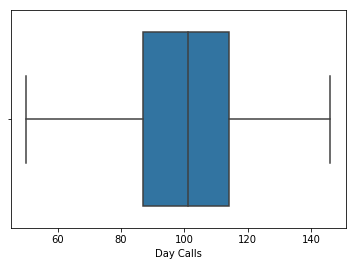

0.01     54.0
0.99    146.0
Name: Day Calls, dtype: float64


In [43]:
sns.boxplot(df['Day Calls'])
plt.show()

print(df['Day Calls'].quantile((0.01,0.99)))

df['Day Calls'] = df['Day Calls'].clip(upper=146,lower=50)


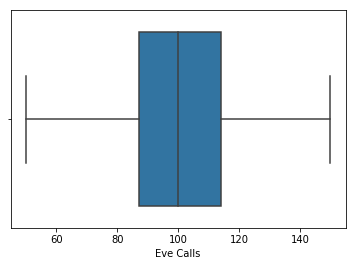

0.01     53.0
0.99    147.0
Name: Eve Calls, dtype: float64


In [45]:
sns.boxplot(df['Eve Calls'])
plt.show()

print(df['Eve Calls'].quantile((0.01,0.99)))

df['Eve Calls'] = df['Eve Calls'].clip(upper=150,lower=50)

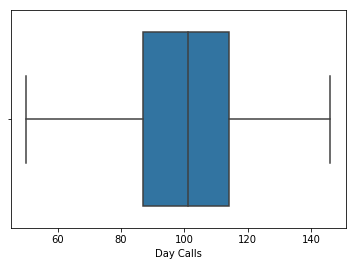

In [79]:
sns.boxplot(df['Day Calls'])
plt.show()

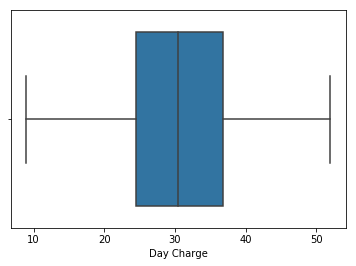

0.01     8.9000
0.99    51.8768
Name: Day Charge, dtype: float64


In [47]:
sns.boxplot(df['Day Charge'])
plt.show()

print(df['Day Charge'].quantile((0.01,0.99)))

df['Day Charge'] = df['Day Charge'].clip(upper=52,lower=8.9)

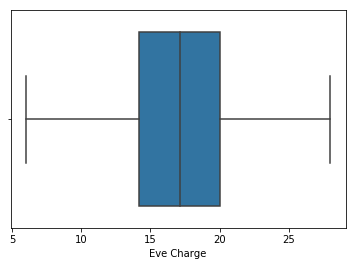

0.01     6.7592
0.99    27.1136
Name: Eve Charge, dtype: float64


In [49]:
sns.boxplot(df['Eve Charge'])
plt.show()

print(df['Eve Charge'].quantile((0.01,0.99)))

df['Eve Charge'] = df['Eve Charge'].clip(upper=28,lower=6.0)


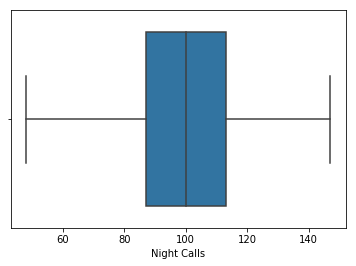

0.01     57.00
0.99    146.68
Name: Night Calls, dtype: float64


In [51]:
sns.boxplot(df['Night Calls'])
plt.show()

print(df['Night Calls'].quantile((0.01,0.99)))

df['Night Calls'] = df['Night Calls'].clip(upper=147,lower=48)


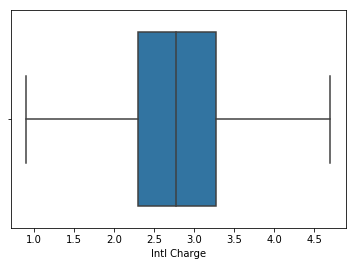

0.01    0.9064
0.99    4.5004
Name: Intl Charge, dtype: float64


In [54]:
sns.boxplot(df['Intl Charge'])
plt.show()

print(df['Intl Charge'].quantile((0.01,0.99)))
df['Intl Charge'] = df['Intl Charge'].clip(upper=4.7,lower=0.9)

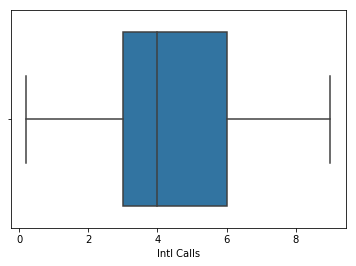

0.01    1.0
0.99    9.0
Name: Intl Calls, dtype: float64


In [56]:
sns.boxplot(df['Intl Calls'])
plt.show()

print(df['Intl Calls'].quantile((0.01,0.99)))
df['Intl Calls'] = df['Intl Calls'].clip(upper=9,lower=0.2)

In [11]:
y = df.Churn

y = y.astype('str')

y.head()

1    0.0
3    0.0
5    0.0
7    0.0
9    0.0
Name: Churn, dtype: object

In [12]:

# Logistic regression, the independent variables can be categorical or numerical in nature #

# identifying the independent and dependent varianbles #


X = df.drop(['Churn'],axis=1)
print(X.head())

   Day Mins  Eve Mins  Intl Mins  CustServ Calls Intl Plan VMail Plan  \
1     265.1     197.4       10.0             1.0       0.0        1.0   
3     161.6     195.5       13.7             1.0       0.0        1.0   
5     243.4     121.2       12.2             0.0       0.0        0.0   
7     299.4      61.9        6.6             2.0       1.0        0.0   
9     166.7     148.3       10.1             3.0       1.0        0.0   

   Day Calls  Day Charge  Eve Calls  Eve Charge  Night Calls  Intl Calls  \
1      110.0       45.07       99.0       16.78         91.0         3.0   
3      123.0       27.47      103.0       16.62        103.0         3.0   
5      114.0       41.38      110.0       10.30        104.0         5.0   
7       71.0       50.90       88.0        5.26         89.0         7.0   
9      113.0       28.34      122.0       12.61        121.0         3.0   

   Intl Charge  
1         2.70  
3         3.70  
5         3.29  
7         1.78  
9         2.73  


In [13]:
X.describe()

# Feature scaling : converting into standard scaler form #
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

sc = SVC()
sc = StandardScaler()


# Creates an error as the we have two categorical variables in the data set, which cannot be processed for the standardized scalar operation

# we need to create dummies for varoables : VMail Plan and Intl Plan


C:\Users\PRAYAG\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [89]:
X.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,1.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,1.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70
5,137.0,0.0,243.4,121.2,162.6,12.2,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29
7,84.0,0.0,299.4,61.9,196.9,6.6,2.0,1.0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78
9,75.0,0.0,166.7,148.3,186.9,10.1,3.0,1.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73


In [14]:
X = X.reset_index()
X.head()

,index,Day Mins,Eve Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Intl Calls,Intl Charge
0,1,265.1,197.4,10.0,1.0,0.0,1.0,110.0,45.07,99.0,16.78,91.0,3.0,2.70
1,3,161.6,195.5,13.7,1.0,0.0,1.0,123.0,27.47,103.0,16.62,103.0,3.0,3.70
2,5,243.4,121.2,12.2,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,5.0,3.29
3,7,299.4,61.9,6.6,2.0,1.0,0.0,71.0,50.90,88.0,5.26,89.0,7.0,1.78
4,9,166.7,148.3,10.1,3.0,1.0,0.0,113.0,28.34,122.0,12.61,121.0,3.0,2.73


In [15]:
X = X.drop(['index'],axis=1)
X.head()

,Day Mins,Eve Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Intl Calls,Intl Charge
0,265.1,197.4,10.0,1.0,0.0,1.0,110.0,45.07,99.0,16.78,91.0,3.0,2.70
1,161.6,195.5,13.7,1.0,0.0,1.0,123.0,27.47,103.0,16.62,103.0,3.0,3.70
2,243.4,121.2,12.2,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,5.0,3.29
3,299.4,61.9,6.6,2.0,1.0,0.0,71.0,50.90,88.0,5.26,89.0,7.0,1.78
4,166.7,148.3,10.1,3.0,1.0,0.0,113.0,28.34,122.0,12.61,121.0,3.0,2.73


In [16]:
# Drop the categorucal variable : Intl Plan # 

X_num = X.drop(['VMail Plan','Intl Plan'],axis=1)


X_num.head()

,Day Mins,Eve Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Intl Calls,Intl Charge
0,265.1,197.4,10.0,1.0,110.0,45.07,99.0,16.78,91.0,3.0,2.70
1,161.6,195.5,13.7,1.0,123.0,27.47,103.0,16.62,103.0,3.0,3.70
2,243.4,121.2,12.2,0.0,114.0,41.38,110.0,10.30,104.0,5.0,3.29
3,299.4,61.9,6.6,2.0,71.0,50.90,88.0,5.26,89.0,7.0,1.78
4,166.7,148.3,10.1,3.0,113.0,28.34,122.0,12.61,121.0,3.0,2.73


In [17]:
# using this steps for dropping highly correlated variables only for doing logistic regression, as for decion trees and radnom forest, the model takes vare of pre processing steps  #


# VIF Factor - checkoing for multi collinearity #

# using this steps for dropping highly correlated variables for doing logistic regression #
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif["features"] = X_num.columns
vif

,VIF Factor,features
0,1.245146e+08,Day Mins
1,3.733824e+07,Eve Mins
2,9.968893e+05,Intl Mins
3,2.371017e+00,CustServ Calls
4,2.060084e+01,Day Calls
5,1.245189e+08,Day Charge
6,2.113599e+01,Eve Calls
7,3.733917e+07,Eve Charge
8,2.132156e+01,Night Calls
9,4.233727e+00,Intl Calls


In [17]:
# dropping the variables : Night Calls as it has high multo coolinearity #

# using this steps for dropping highly correlated variables only for doing logistic regression, as for decion trees and radnom forest, the model takes vare of pre processing steps  #


X_num1 = X_num.drop(['Night Calls'],axis=1)

X_num1.head()

,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Intl Calls,Intl Charge
0,1.0,110.0,45.07,99.0,16.78,3.0,2.70
1,1.0,123.0,27.47,103.0,16.62,3.0,3.70
2,0.0,114.0,41.38,110.0,10.30,5.0,3.29
3,2.0,71.0,50.90,88.0,5.26,7.0,1.78
4,3.0,113.0,28.34,122.0,12.61,3.0,2.73


In [18]:
# # using this steps for dropping highly correlated variables only for doing logistic regression, as for decion trees and radnom forest, the model takes vare of pre processing steps  #


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_num1.values, i) for i in range(X_num1.shape[1])]
vif["features"] = X_num1.columns
vif

# dropping eve calls #

X_num2 = X_num1.drop(['Eve Calls'],axis=1)
X_num2.head()

,CustServ Calls,Day Calls,Day Charge,Eve Charge,Intl Calls,Intl Charge
0,1.0,110.0,45.07,16.78,3.0,2.70
1,1.0,123.0,27.47,16.62,3.0,3.70
2,0.0,114.0,41.38,10.30,5.0,3.29
3,2.0,71.0,50.90,5.26,7.0,1.78
4,3.0,113.0,28.34,12.61,3.0,2.73


In [19]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_num2.values, i) for i in range(X_num2.shape[1])]
vif["features"] = X_num2.columns
vif

,VIF Factor,features
0,2.343746,CustServ Calls
1,16.884412,Day Calls
2,10.102742,Day Charge
3,12.770613,Eve Charge
4,4.150628,Intl Calls
5,11.851202,Intl Charge


In [20]:
# using this steps for dropping highly correlated variables only for doing logistic regression, as for decion trees and radnom forest, the model takes vare of pre processing steps  #


# Dropping day calls #

X_num3 = X_num2.drop(['Day Calls'],axis=1)
X_num3.head()

,CustServ Calls,Day Charge,Eve Charge,Intl Calls,Intl Charge
0,1.0,45.07,16.78,3.0,2.70
1,1.0,27.47,16.62,3.0,3.70
2,0.0,41.38,10.30,5.0,3.29
3,2.0,50.90,5.26,7.0,1.78
4,3.0,28.34,12.61,3.0,2.73


In [21]:
# # using this steps for dropping highly correlated variables only for doing logistic regression, as for decion trees and radnom forest, the model takes vare of pre processing steps  #


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_num3.values, i) for i in range(X_num3.shape[1])]
vif["features"] = X_num3.columns
vif

,VIF Factor,features
0,2.318162,CustServ Calls
1,9.062552,Day Charge
2,10.924853,Eve Charge
3,4.052849,Intl Calls
4,10.167071,Intl Charge


In [25]:
X_num.head()

,Day Mins,Eve Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Intl Calls,Intl Charge
0,265.1,197.4,10.0,1.0,110.0,45.07,99.0,16.78,91.0,3.0,2.70
1,161.6,195.5,13.7,1.0,123.0,27.47,103.0,16.62,103.0,3.0,3.70
2,243.4,121.2,12.2,0.0,114.0,41.38,110.0,10.30,104.0,5.0,3.29
3,299.4,61.9,6.6,2.0,71.0,50.90,88.0,5.26,89.0,7.0,1.78
4,166.7,148.3,10.1,3.0,113.0,28.34,122.0,12.61,121.0,3.0,2.73


In [18]:
# Feature scaling to comvert all variables into a same scale #

mn_mx = MinMaxScaler()

X1 = pd.DataFrame(mn_mx.fit_transform(X_num),columns = X_num.columns)
X1.head()


,Day Mins,Eve Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Intl Calls,Intl Charge
0,0.755701,0.542755,0.500,0.111111,0.666667,0.755701,0.582353,0.542866,0.408451,0.15,0.500000
1,0.460661,0.537531,0.685,0.111111,0.745455,0.460597,0.605882,0.537690,0.492958,0.15,0.685185
2,0.693843,0.333242,0.610,0.000000,0.690909,0.693830,0.647059,0.333225,0.500000,0.25,0.609259
3,0.853478,0.170195,0.330,0.222222,0.430303,0.853454,0.517647,0.170171,0.394366,0.35,0.329630
4,0.475200,0.407754,0.505,0.333333,0.684848,0.475184,0.717647,0.407959,0.619718,0.15,0.505556


In [19]:
# PCA analysis #

c = PCA(n_components=11)

X_trans = c.fit_transform(X1)
X_trans

array([[ -3.42695305e-01,  -1.83304557e-02,   1.96284184e-02, ...,
          8.05451542e-05,   2.03727039e-05,  -2.91357101e-05],
       [  8.38477030e-02,  -1.94131573e-01,  -1.46343525e-01, ...,
         -6.25109875e-05,   5.22657738e-05,   3.04210130e-05],
       [ -2.42934167e-01,  -3.27603142e-01,   1.32933968e-01, ...,
          6.10018109e-04,  -5.02099809e-05,  -1.80254026e-05],
       ..., 
       [  1.49376167e-03,   2.23526090e-02,  -4.37934243e-01, ...,
         -3.20846107e-04,   4.46060103e-05,  -4.04107761e-05],
       [ -1.55313170e-01,   1.59207273e-01,   3.61045142e-01, ...,
          9.42917251e-05,   8.44532443e-05,  -4.18800836e-05],
       [ -2.14596931e-01,  -3.06906997e-02,  -3.57357395e-01, ...,
         -5.18103959e-05,  -3.50945608e-05,  -1.62333279e-05]])

In [20]:
# variance explained by each variable #

c.explained_variance_

# eighen values for each factor #

# identifying the proportion of variance explained #

print(c.explained_variance_ratio_)

[  2.29768347e-01   1.87427207e-01   1.83369688e-01   1.01848754e-01
   9.02986158e-02   7.21061626e-02   7.01015211e-02   6.50790057e-02
   6.72118009e-07   2.07105565e-08   5.48065340e-09]


In [21]:
d = np.cumsum(np.round((c.explained_variance_ratio_)*100,2))
print(d)

# 11 variables are able to explain 100% of the variance 

# no. of components = 7

[  22.98   41.72   60.06   70.24   79.27   86.48   93.49  100.    100.
  100.    100.  ]


In [22]:
c = PCA(n_components=7)

X_trans = c.fit_transform(X1)
X_trans

array([[-0.3426953 , -0.01833046,  0.01962842, ..., -0.08163007,
        -0.07259177, -0.0565648 ],
       [ 0.0838477 , -0.19413157, -0.14634353, ...,  0.01082091,
        -0.06428025, -0.14047549],
       [-0.24293417, -0.32760314,  0.13293397, ...,  0.00609081,
         0.02828315, -0.0643008 ],
       ..., 
       [ 0.00149376,  0.02235261, -0.43793424, ..., -0.06680307,
         0.03024148, -0.02741063],
       [-0.15531317,  0.15920727,  0.36104514, ...,  0.24759958,
         0.27132959, -0.00810424],
       [-0.21459693, -0.0306907 , -0.35735739, ..., -0.18784303,
        -0.05311492, -0.05206028]])

In [23]:
# developing a data frame from this set #

X_num1 = pd.DataFrame(X_trans,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

X_num1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.342695,-0.018330,0.019628,-0.049152,-0.081630,-0.072592,-0.056565
1,0.083848,-0.194132,-0.146344,-0.064172,0.010821,-0.064280,-0.140475
2,-0.242934,-0.327603,0.132934,-0.179065,0.006091,0.028283,-0.064301
3,-0.470930,-0.194724,0.569590,0.050748,-0.071157,0.095068,0.211329
4,0.056992,-0.125665,0.166406,0.139239,0.160309,-0.031094,-0.106835


In [24]:
cat = X[['Intl Plan','VMail Plan']]
len(cat)

cat.head()

,Intl Plan,VMail Plan
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0


In [38]:
len(X1)

3333

In [25]:
# concatenating the categorical and numerical variables #

X_n = pd.concat([X_num1,cat],axis=1)
X_n.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Intl Plan,VMail Plan
0,-0.342695,-0.018330,0.019628,-0.049152,-0.081630,-0.072592,-0.056565,0.0,1.0
1,0.083848,-0.194132,-0.146344,-0.064172,0.010821,-0.064280,-0.140475,0.0,1.0
2,-0.242934,-0.327603,0.132934,-0.179065,0.006091,0.028283,-0.064301,0.0,0.0
3,-0.470930,-0.194724,0.569590,0.050748,-0.071157,0.095068,0.211329,1.0,0.0
4,0.056992,-0.125665,0.166406,0.139239,0.160309,-0.031094,-0.106835,1.0,0.0


In [26]:
# splitting the data set into test and train #

X_train,X_test,Y_train,Y_test = train_test_split(X_n,y,test_size=0.25,random_state=30)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(2499, 9)
(834, 9)
(834,)
(2499,)


In [27]:
# Buildijg the logistic Regression model #

lm = LogisticRegression()
mo = lm.fit(X_train,Y_train)


C:\Users\PRAYAG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
mo.coef_  # (Coefficients of 13 independent variables)

array([[-0.08228659,  0.70224558,  3.20877859,  0.20334471,  2.72907328,
         0.16400867,  1.65410414,  0.04308348,  0.26513417, -1.14503609,
         0.78668663, -1.32714437,  1.87592305]])

In [87]:
y.value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

In [28]:
# predicting results for train set # 

from sklearn.metrics import accuracy_score
# classification report and confusion matrix #
Y_train_pred = mo.predict(X_train)

con = confusion_matrix(Y_train_pred,Y_train)
con

acc = (1966+50)/(1966+50+37+280)
print(acc)

acc1 = accuracy_score(Y_train_pred,Y_train)
print(acc1)

# Acc = 0.864 without PCA 
# Acc = 0.867 with PCA 


0.864123446206601
0.866746698679


In [31]:
# classification report for train set #

cla = classification_report(Y_train_pred,Y_train)
print("\n",cla)



               precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      2248
         1.0       0.15      0.58      0.24        85

   micro avg       0.86      0.86      0.86      2333
   macro avg       0.57      0.73      0.58      2333
weighted avg       0.95      0.86      0.90      2333



In [29]:
# test data set # # Validation of the results#

Y_test_pred = mo.predict(X_test)

con1 = confusion_matrix(Y_test_pred,Y_test)
print(con1)

# Acc = 0.854

Acc = (834+20)/(834+20+13+133)
print(Acc)


acc1 = accuracy_score(Y_test_pred,Y_test)

print(acc1)
# Means the developed model can predict the results with 85.6% accuracy

# as the accuracy of test and train are same, model has no overfitting in it #

cla1 = classification_report(Y_test,Y_test_pred)
print("\n",cla1)

# Acc = 0.854 without PCA 
# Acc = 0.854 with PCA 

# So this developed model with an accuracy of 85.4 % accuracy   with threshold of 0.5#

# recal = (20)/(20+133) - TPR

[[695 103]
 [ 18  18]]
0.854
0.854916067146

               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       713
         1.0       0.50      0.15      0.23       121

   micro avg       0.85      0.85      0.85       834
   macro avg       0.69      0.56      0.57       834
weighted avg       0.82      0.85      0.82       834



In [31]:
# decision trees #

from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc = DecisionTreeClassifier(min_samples_leaf=20)
print(dtc)
mo = dtc.fit(X_train,Y_train)

# parameters to be tunned #
# max_depth = 3,4,5
#min_samples_split=90,95,100 
#max_leaf_nodes = 7,8,10
# min_sample_leaf = 30,32,35,80

# training set # size =2333

y_pred_train = mo.predict(X_train)

con = confusion_matrix(y_pred_train,Y_train)

con =(1954+242)/(1954+242+88+49)
print(con)
acc = accuracy_score(y_pred_train,Y_train)
print(acc)

# PCA accuracy : 0.930

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.9412773253321903
0.933973589436


In [33]:
# testiong set #

y_pred_test = mo.predict(X_test)

con = confusion_matrix(y_pred_test,Y_test)
con = (813+108)/(813+108+45+34)


print(con)

acc = accuracy_score(y_pred_test,Y_test)

print(acc)


# test accuracy score : 0.921

# Acc = 0.92 without PCA 
# Acc = 0.929 with PCA 

0.921
0.929256594724


In [34]:
# Building the grid search hyper paramter tuning model with Cross validatoon #

params = {'criterion':['gini','entropy'],'min_samples_leaf':[14,15,16,20]}

In [35]:
dtc1 = DecisionTreeClassifier()

In [160]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [156]:
y.head()

1    0.0
3    0.0
5    0.0
7    0.0
9    0.0
Name: Churn, dtype: category
Categories (2, float64): [0.0, 1.0]

In [36]:
# Hyperparamter tuning #

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dtc1,params,cv=5)

mo_gr = grid.fit(X_train,Y_train)

In [37]:
print(mo_gr.best_estimator_)

print(mo_gr.best_params_)

print(mo_gr.best_score_)

co = mo_gr.best_estimator_

# Acc = 0.9305 without PCA 
# Acc = 0.9237 with PCA 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'criterion': 'gini', 'min_samples_leaf': 20}
0.919967987195


In [38]:
# predicting in test data set #


y_pred_test = co.predict(X_test)

con = confusion_matrix(y_pred_test,Y_test)
con = (813+108)/(813+108+45+34)


print(con)

acc = accuracy_score(y_pred_test,Y_test)

print(acc)

# Acc = 0.923 without PCA 
# Acc = 0.929 with PCA 

0.921
0.929256594724


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Random Forest #

rf = RandomForestClassifier(n_estimators=28,max_features=4,min_samples_leaf=10)
print(rf)
# trainign data set #

mo_rf = rf.fit(X_train,Y_train)

y_train_pred = mo_rf.predict(X_train)

acc = accuracy_score(y_train_pred,Y_train)

print(acc)

# tuning the paramters to reduce te overfitting #
# parameters to be tunned #
# max_depth = 3,4,5
#min_samples_split=90,95,100 
#max_leaf_nodes = 7,8,10
# min_sample_leaf = 30,32,35,80
# max_features =2,3,4
# n_estimators = 20,25,28


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.951180472189


In [42]:
y_pred_test = mo_rf.predict(X_test)

con = confusion_matrix(y_pred_test,Y_test)

con = (798+101)/(798+101+49+52)

print(con)

acc = accuracy_score(y_pred_test,Y_test)

print(acc)

# Logitic Regression test accuracy: 0.854
# decision tree test accuracy: 0.921
# random forest test accuracy : 0.9414


# as the data set is imbalanced class, so we need to go for stratidied cross validarion to improce tyhwe accueact further #

0.899
0.941247002398


In [126]:
# Parameters for tuning #

params = {'min_samples_leaf':[10,11,12,13],'n_estimators':[26,27,28,30],'max_features':[3,4]}

# max_depth = 3,4,5
#min_samples_split=90,95,100 
#max_leaf_nodes = 7,8,10
# min_sample_leaf = 30,32,35,80
# max_features =2,3,4
# n_estimators = 20,25,28


In [127]:
# develop a hyper parameter tunned model with cross validation #

from sklearn.model_selection import GridSearchCV

r = RandomForestClassifier()
grid = GridSearchCV(r,params,cv=5)
mo_gr = grid.fit(X_train,Y_train)


In [129]:
print(mo_gr.best_score_)
print(mo_gr.best_params_)
print(mo_gr.best_estimator_)

cp = mo_gr.best_estimator_

0.929171668667
{'max_features': 4, 'n_estimators': 27, 'min_samples_leaf': 10}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [130]:
# testing model of random forest #


y_pred_test = cp.predict(X_test)

con = confusion_matrix(y_pred_test,Y_test)
con = (813+108)/(813+108+45+34)


print(con)

acc = accuracy_score(y_pred_test,Y_test)

print(acc)

# Accuracy_score : 0.929 with hyperparameter tuning for random forest 

# Acc = 0.929 without PCA 
# Acc = 0.940 with PCA  is best accuaracy for this model through Grid Search CV, cross valudation and hyper parameter tunning using Radnome Forest as weak leaner

0.921
0.940047961631


In [84]:
# applying tyhe boosting techniques in thjis model #

# Using adaboost ckassifier #

from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=1)

ad =  AdaBoostClassifier(n_estimators=1000,base_estimator=dt,learning_rate=0.7)

m = ad.fit(X_train,Y_train)


In [85]:
#  the predicting train set #

y_pred_train = m.predict(X_train)

sc = accuracy_score(y_pred_train,Y_train)
sc

0.92597038815526211

In [86]:
# predicting on testing data #

y_pred_test = m.predict(X_test)

sc = accuracy_score(y_pred_test,Y_test)
sc


0.86330935251798557

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
# Gradient boosting technique #

gclf = GradientBoostingClassifier(n_estimators=2500,verbose=True,max_depth=4)

mo = gclf.fit(X_train,Y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7365           10.00s
         2           0.6812           11.24s
         3           0.6372           11.65s
         4           0.5988           11.23s
         5           0.5677           11.47s
         6           0.5420           11.63s
         7           0.5212           11.39s
         8           0.5031           11.84s
         9           0.4862           12.72s
        10           0.4668           13.19s
        20           0.3630           12.52s
        30           0.3077           12.01s
        40           0.2697           12.05s
        50           0.2367           13.42s
        60           0.2136           14.06s
        70           0.1966           13.46s
        80           0.1815           13.06s
        90           0.1674           12.66s
       100           0.1571           12.98s
       200           0.0799           11.47s
       300           0.0440           10.67s
       40

In [123]:
#  the predicting train set #

y_pred_train = mo.predict(X_train)

sc = accuracy_score(y_pred_train,Y_train)
sc

1.0

In [124]:
# testing data set #

y_pred_test = mo.predict(X_test)

sc = accuracy_score(y_pred_test,Y_test)
sc

0.94724220623501199

In [59]:
# support vector machine #

from sklearn.svm import SVC

sv = SVC(C=500,degree=3,coef0=10,gamma='scale',kernel='poly')

mo_s = sv.fit(X_train,Y_train)



In [60]:
# training set #

y_train_pred = mo_s.predict(X_train)

# accuracy #

acc = accuracy_score(y_pred_train,Y_train)

print(acc)

0.933973589436


In [62]:
#testing set #

y_test_pred = mo_s.predict(X_test)

# accuracy #

acc = accuracy_score(y_pred_test,Y_test)

print(acc)

0.9448441247


In [77]:
# Stratified k fold cross vcalidation # : as the data is imbalanced 

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X_n,y): 
    print("Train:", train_index, "Validation:", test_index) 
    X1_train, X1_test = X_n.iloc[train_index], X_n.iloc[test_index] 
    Y1_train, Y1_test = y.iloc[train_index], y.iloc[test_index]

Train: [ 663  664  665 ..., 3330 3331 3332] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [78]:
# data sets with proporyion of both the classes #

print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(2667, 9)
(666, 9)
(2667,)
(666,)


In [64]:
rf1 = RandomForestClassifier()

In [109]:
# Building the model with Random Forest Hyper paramter tunung #

param_grid = {'criterion':['entropy','gini'],'n_estimators':[26,27,28],'max_features':[3,4],'min_samples_leaf':[10,11]}

# estimators = no. of trees  = no. of observations/100 
# no. of features = sqrt(variables) = sqrt(17) = 4
# applying yhe grid search cv and cross validation #,

grid1 = GridSearchCV(rf1, param_grid, cv=skf, scoring='accuracy')
# es = 13,14,25,27,28

# 'min_samples_leaf':[10,11,12,15,18,20] 

In [90]:
from sklearn.model_selection import GridSearchCV

mo_gr = grid1.fit(X1_train,Y1_train)

In [91]:
print(mo_gr.best_score_)
print(mo_gr.best_params_)
print(mo_gr.best_estimator_)
cp = mo_gr.best_estimator_

0.933633295838
{'criterion': 'gini', 'max_features': 4, 'n_estimators': 29, 'min_samples_leaf': 10}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=29, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [92]:
# predicting the X_train #
y_pred_train = cp.predict(X1_train)
acc = accuracy_score(y_pred_train,Y1_train)
acc

0.9516310461192351

In [93]:
# predicting the X_test #

y_pred = cp.predict(X1_test)
acc = accuracy_score(y_pred,Y1_test)
acc

# Random Forest and Decision trees, it handles mutli collinearity and outliers, so we need not to remove any variables, instead applying PCA which handles collinearity  #

# WIhtout PCA #

# Logitic Regression test accuracy: 0.854

# decision tree test accuracy: 0.921
# decision tree test accuracy with gridsearch CV: 0.923

# random forest test accuracy : 0.927
# random forest test accuracy with gridsearch CV: 0.929


# With PCA #

# Logitic Regression test accuracy: 0.854

# decision tree test accuracy: 0.929
# decision tree test accuracy with gridsearch CV: 0.929

# random forest test accuracy : 0.944
# random forest test accuracy with gridsearch CV: 0.94 - best accuracy for this model

# Random Forest test accuracy with stratifed cross validation & grid search CV : 0.936 

# 0.940 - best accuracy for this model (94.0% accuracy for churn)

# we can follow 2 approaches:
# remove insignificant variables (visualization) , drop correlated variabkes and apply hyper paramtet tuning, grid search CV
# better approach - remove insignificant variables (visualization) and apply PCA (reduce variables) aliong with apply hyper paramtet tuning, grid search K fold CV or stratified


0.93693693693693691